In [1]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(0)

In [3]:
def minmax_scaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [4]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    for i in range(0, len(time_series) - seq_length):
        _x = time_series[i : i + seq_length, :]
        _y = time_series[i + seq_length, [-1]]
        print(_x, "->", _y)
        dataX.append(_x)
        dataY.append(_y)
    return np.array(dataX), np.array(dataY)

In [5]:
seq_length = 7
data_dim = 5
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
iterations = 500

In [6]:
xy = np.loadtxt("data-02-stock_daily.csv", delimiter=",")
xy = xy[::-1]

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

train_set = minmax_scaler(train_set)
test_set = minmax_scaler(test_set)

trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)

trainX_tensor = torch.FloatTensor(trainX)
trainY_tensor = torch.FloatTensor(trainY)

testX_tensor = torch.FloatTensor(testX)
testY_tensor = torch.FloatTensor(testY)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]] -> [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.7831

 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]] -> [0.15774724]
[[0.15083007 0.15652616 0.17125436 0.08043381 0.15190324]
 [0.12747291 0.12668186 0.13495418 0.14576499 0.12845636]
 [0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.14638644 0.16055029 0.12512324 0.16140873]
 [0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]] -> [0.16447158]
[[0.12747291 0.12668186 0.13495418 0.14576499 0.12845636]
 [0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.14638644 0.16055029 0.12512324 0.16140873]
 [0.15362463 0.14731871 0.15328322 0.17597921 0.14539013]
 [0.12888757 0.13216354 0.14780588 0.17885632 0.13993334]
 [0.13568413 0.15203469 0.16280564 0.17558483 0.15774724]
 [0.15124406 0.15972463 0.16256223 0.12753428 0.16447158]] -> [0.17587808]
[[0.1238849  0.13046909 0.14710799 0.11153536 0.13049833]
 [0.13495975 0.146386

 [0.32318191 0.31010892 0.31094226 0.18250433 0.28845341]] -> [0.28905096]
[[0.31778677 0.36331257 0.36782869 0.25867049 0.38468415]
 [0.3641268  0.39746527 0.41181116 0.28764979 0.40296262]
 [0.38085265 0.3826114  0.40817603 0.12441529 0.39358476]
 [0.36868294 0.35791349 0.36885848 0.14085242 0.37118466]
 [0.34931971 0.33710577 0.34698853 0.11932761 0.3230394 ]
 [0.32318191 0.31010892 0.31094226 0.18250433 0.28845341]
 [0.29278837 0.29283811 0.32269515 0.13980879 0.28905096]] -> [0.35852117]
[[0.3641268  0.39746527 0.41181116 0.28764979 0.40296262]
 [0.38085265 0.3826114  0.40817603 0.12441529 0.39358476]
 [0.36868294 0.35791349 0.36885848 0.14085242 0.37118466]
 [0.34931971 0.33710577 0.34698853 0.11932761 0.3230394 ]
 [0.32318191 0.31010892 0.31094226 0.18250433 0.28845341]
 [0.29278837 0.29283811 0.32269515 0.13980879 0.28905096]
 [0.3174871  0.33168294 0.34710981 0.18593339 0.35852117]] -> [0.3603131]
[[0.38085265 0.3826114  0.40817603 0.12441529 0.39358476]
 [0.36868294 0.3579134

In [7]:
class Net(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, layers):
        super(Net, self).__init__()
        self.rnn = torch.nn.LSTM(input_dim, hidden_dim, num_layers=layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_dim, output_dim, bias=True)
    
    def forward(self, x):
        x, _status = self.rnn(x)
        x = self.fc(x[:, -1])
        return x

net = Net(data_dim, hidden_dim, output_dim, 1)

In [8]:
criterion = torch.nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=learning_rate)

In [9]:
for i in range(iterations):
    optimizer.zero_grad()
    outputs = net(trainX_tensor)
    loss = criterion(outputs, trainY_tensor)
    loss.backward()
    optimizer.step()
    print(i, loss.item())

0 0.2271038144826889
1 0.18340934813022614
2 0.15106436610221863
3 0.1261231154203415
4 0.10598734021186829
5 0.08915016800165176
6 0.07493706792593002
7 0.06327901035547256
8 0.05449602007865906
9 0.04902385175228119
10 0.04693441092967987
11 0.04731706157326698
12 0.04838263615965843
13 0.04839477315545082
14 0.046337660402059555
15 0.04207770898938179
16 0.03620169684290886
17 0.029662005603313446
18 0.023386560380458832
19 0.01801123656332493
20 0.013800659216940403
21 0.010714652948081493
22 0.00853221956640482
23 0.006976508069783449
24 0.005824481602758169
25 0.004987422842532396
26 0.004524713382124901
27 0.004554683342576027
28 0.005089897662401199
29 0.005920968484133482
30 0.006684891879558563
31 0.00707267364487052
32 0.006973989773541689
33 0.006471904460340738
34 0.005753521807491779
35 0.005014692898839712
36 0.0043952916748821735
37 0.003953743726015091
38 0.003676638239994645
39 0.0035109836608171463
40 0.00340130808763206
41 0.0033151074312627316
42 0.0032488948199898

338 0.0014279616298153996
339 0.0014264286728575826
340 0.0014249020023271441
341 0.0014233817346394062
342 0.0014218678697943687
343 0.001420359592884779
344 0.0014188579516485333
345 0.0014173623640090227
346 0.0014158725971356034
347 0.0014143887674435973
348 0.001412911107763648
349 0.001411439385265112
350 0.0014099738327786326
351 0.0014085139846429229
352 0.00140706030651927
353 0.0014056123327463865
354 0.0014041704125702381
355 0.0014027344295755029
356 0.001401304267346859
357 0.0013998796930536628
358 0.001398461521603167
359 0.0013970488216727972
360 0.0013956426410004497
361 0.0013942418154329062
362 0.0013928473927080631
363 0.0013914586743339896
364 0.0013900762423872948
365 0.001388699864037335
366 0.0013873293064534664
367 0.0013859651517122984
368 0.0013846073998138309
369 0.0013832554686814547
370 0.001381910522468388
371 0.0013805713970214128
372 0.0013792390236631036
373 0.0013779130531474948
374 0.0013765939511358738
375 0.0013752812519669533
376 0.001373975770547

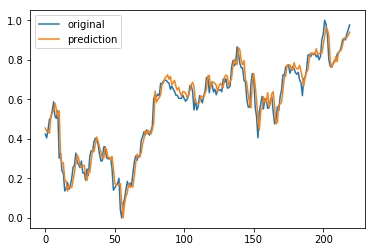

In [10]:
plt.plot(testY)
plt.plot(net(testX_tensor).data.numpy())
plt.legend(['original', 'prediction'])
plt.show()